# Amplitude Envelope

In [4]:
import IPython.display as ipd
import torch
import torchaudio
from pathlib import Path

DATA_DIR = Path('data')

def download_asset_external(url: str, key: str) -> str:
    path = DATA_DIR / Path(key)
    if not path.exists():
        path.parent.mkdir(parents=True, exist_ok=True)
        torch.hub.download_url_to_file(url, path)
    return str(path)

# Import Audio files

In [11]:

GITHUB_PATH = "https://github.com/musikalkemist/AudioSignalProcessingForML/raw/master/8-%20Implementing%20the%20amplitude%20envelope/"

debussy_file = download_asset_external(GITHUB_PATH + "audio/debussy.wav", "audio/debussy.wav")
duke_file = download_asset_external(GITHUB_PATH + "audio/duke.wav", "audio/duke.wav")
redhot_file = download_asset_external(GITHUB_PATH + "audio/redhot.wav", "audio/redhot.wav")

In [15]:
debussy_waveform, sample_rate = torchaudio.load(debussy_file)
print(torchaudio.info(debussy_file))
ipd.Audio(debussy_waveform, rate=sample_rate)

AudioMetaData(sample_rate=22050, num_frames=661500, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [17]:
duke_waveform, sample_rate = torchaudio.load(duke_file)
print(torchaudio.info(duke_file))
ipd.Audio(duke_waveform, rate=sample_rate)

AudioMetaData(sample_rate=22050, num_frames=661500, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [16]:
redhot_waveform, sample_rate = torchaudio.load(redhot_file)
print(torchaudio.info(redhot_file))
ipd.Audio(redhot_waveform, rate=sample_rate)

AudioMetaData(sample_rate=22050, num_frames=661500, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [18]:
sample_duration = 1 / sample_rate 
print(f"Duration of 1 sample: {sample_duration:.6f} seconds")

Duration of 1 sample: 0.000045 seconds


In [20]:
audio_duration = debussy_waveform.size(1) / sample_rate
print(f"Duration of waveform: {audio_duration:.2f} seconds")

Duration of waveform: 30.00 seconds


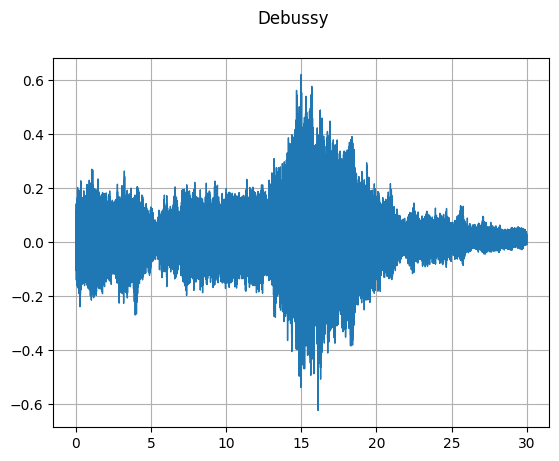

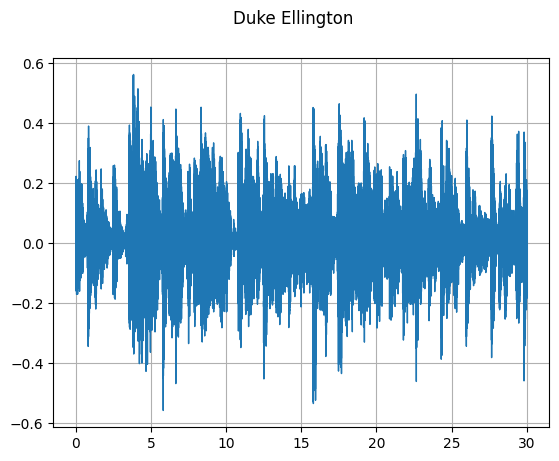

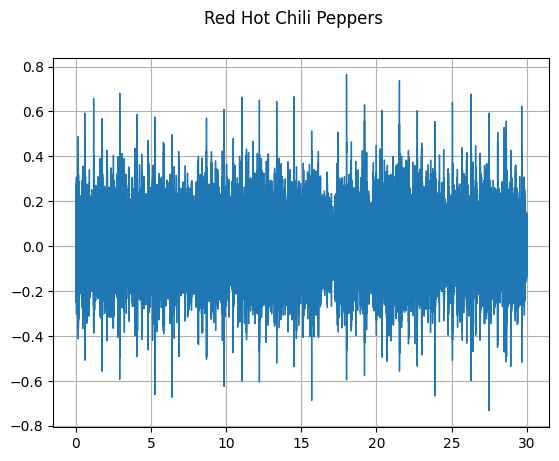

In [24]:
import matplotlib.pyplot as plt

def plot_waveform(waveform, sample_rate, label):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(label)

plot_waveform(debussy_waveform, sample_rate, "Debussy")
plot_waveform(duke_waveform, sample_rate, "Duke Ellington")
plot_waveform(redhot_waveform, sample_rate, "Red Hot Chili Peppers")

# Amplitude Envelope

AudioMetaData(sample_rate=22050, num_frames=661500, num_channels=1, bits_per_sample=16, encoding=PCM_S)
torch.Size([1, 661500])
torch.Size([1290])
torch.Size([1290])
torch.Size([1290])


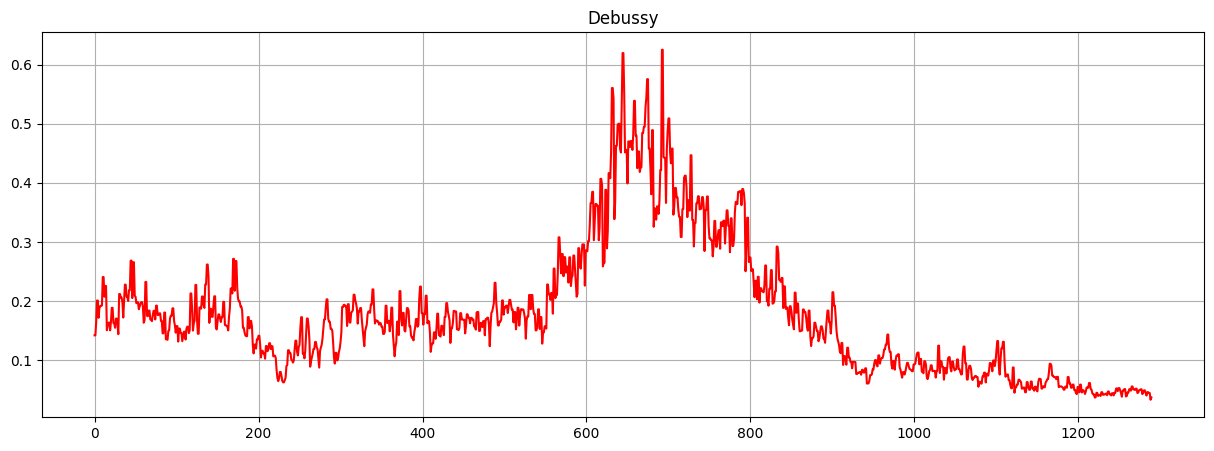

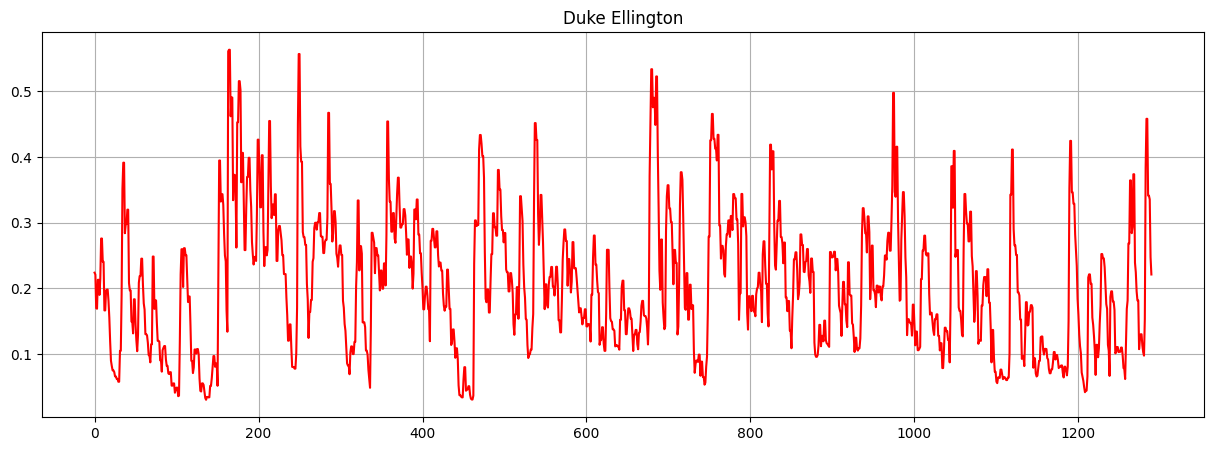

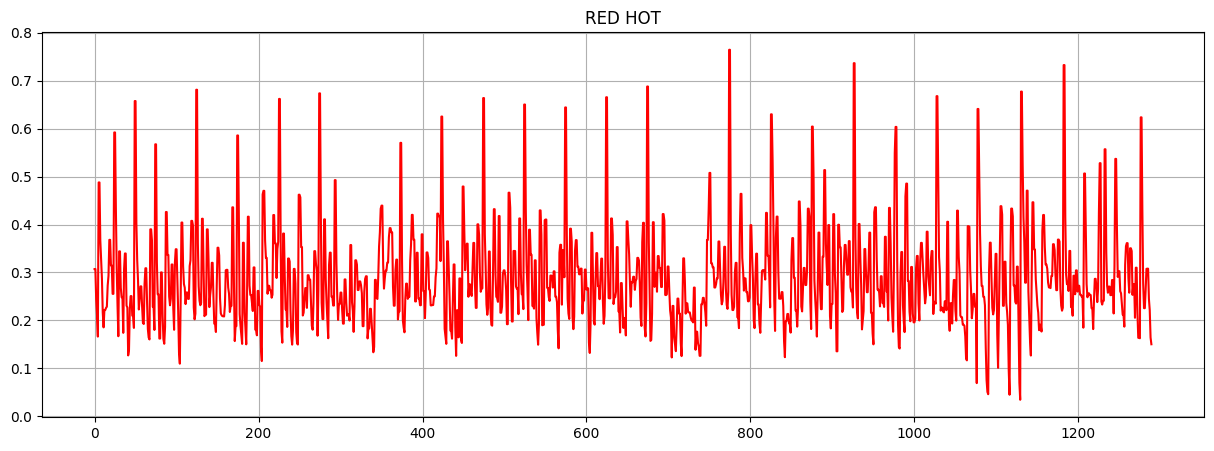

In [120]:
FRAME_SIZE = 1024
STEP_SIZE = 512

def amplitude_envelope(waveform: torch.Tensor, frame_size: int, hop_length: int) -> torch.Tensor:
    samples = waveform.flatten().unfold(0, frame_size, hop_length)
    return samples.abs().max(dim=1).values

#print(amplitude_envelope(debussy_waveform, ))
metadata = torchaudio.info(debussy_file)
print(metadata)
print(debussy_waveform.shape)

debussy_ae = amplitude_envelope(debussy_waveform, FRAME_SIZE, STEP_SIZE).flatten()
print(debussy_ae.shape)

plt.figure(figsize=(15,17))
plt.subplot(3, 1, 1)
plt.plot(range(debussy_ae.shape[0]), debussy_ae.numpy(), color='r')
plt.title("Debussy")
plt.grid(True)

duke_ae = amplitude_envelope(duke_waveform, FRAME_SIZE, STEP_SIZE).flatten()
print(duke_ae.shape)

plt.figure(figsize=(15,17))
plt.subplot(3, 1, 1)
plt.plot(range(duke_ae.shape[0]), duke_ae.numpy(), color='r')
plt.title("Duke Ellington")
plt.grid(True)

redhot_ae = amplitude_envelope(redhot_waveform, FRAME_SIZE, STEP_SIZE).flatten()
print(redhot_ae.shape)

plt.figure(figsize=(15,17))
plt.subplot(3, 1, 1)
plt.plot(range(redhot_ae.shape[0]), redhot_ae.numpy(), color='r')
plt.title("RED HOT")
plt.grid(True)
